#                                      HOSPITALITY DOMAIN DATA ANALYSIS

AtliQ Grands owns multiple five-star hotels across India. They have been in the hospitality industry for the past 20 years. Due to strategic moves from other competitors and ineffective decision-making in management, AtliQ Grands are losing its market share and revenue in the luxury/business hotels category. 
As a strategic move, the managing director of AtliQ Grands wanted to incorporate “Business and Data Intelligence” to regain their market share and revenue. 
However, they do not have an in-house data analytics team to provide them with these insights.

Their revenue management team had decided to hire a 3rd party service provider to provide them with insights from their historical data.

# --DATA IMPORT

In [209]:
# importing libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Datasets
We have 5 csv file 

   - dim_date.csv  
   - dim_hotels.csv
   - dim_rooms.csv
   - fact_aggregated_bookings
   - fact_bookings.csv

In [210]:
# uploading datasets

df_date=pd.read_csv('dim_date.csv')
df_hotels= pd.read_csv('dim_hotels.csv')
df_rooms=pd.read_csv('dim_rooms.csv')
df_bookings=pd.read_csv('fact_bookings.csv')
df_agg_booking=pd.read_csv('fact_aggregated_bookings.csv')


# --DATA EXPLORATION

Explore booking_dataset

In [211]:
df_bookings.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,27-04-22,1/5/2022,2/5/2022,-3.0,RT1,direct online,1.0,Checked Out,10010,10010
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
2,May012216558RT13,16558,28-04-22,1/5/2022,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100
3,May012216558RT14,16558,28-04-22,1/5/2022,2/5/2022,-2.0,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920


In [212]:
df_bookings.shape

(134590, 12)

In [213]:
df_bookings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134590 entries, 0 to 134589
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   booking_id         134590 non-null  object 
 1   property_id        134590 non-null  int64  
 2   booking_date       134590 non-null  object 
 3   check_in_date      134590 non-null  object 
 4   checkout_date      134590 non-null  object 
 5   no_guests          134587 non-null  float64
 6   room_category      134590 non-null  object 
 7   booking_platform   134590 non-null  object 
 8   ratings_given      56683 non-null   float64
 9   booking_status     134590 non-null  object 
 10  revenue_generated  134590 non-null  int64  
 11  revenue_realized   134590 non-null  int64  
dtypes: float64(2), int64(3), object(7)
memory usage: 12.3+ MB


In [214]:
df_bookings['room_category'].unique()

array(['RT1', 'RT2', 'RT3', 'RT4'], dtype=object)

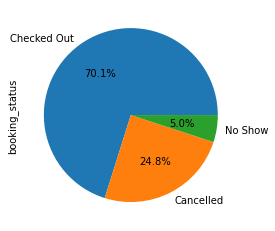

In [215]:
df_bookings['booking_status'].value_counts().plot(kind='pie',autopct='%1.1f%%');

<AxesSubplot:>

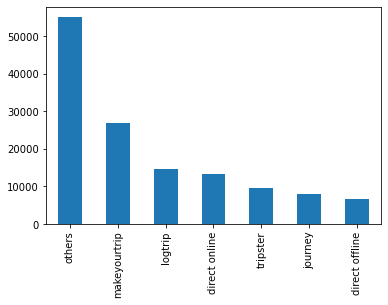

In [216]:
df_bookings['booking_platform'].value_counts().plot(kind='bar')

In [217]:
df_bookings.describe()

,property_id,no_guests,ratings_given,revenue_generated,revenue_realized
count,134590.000000,134587.000000,56683.000000,1.345900e+05,134590.000000
mean,18061.113493,2.036170,3.619004,1.537805e+04,12696.123256
std,1093.055847,1.034885,1.235009,9.303604e+04,6928.108124
min,16558.000000,-17.000000,1.000000,6.500000e+03,2600.000000
25%,17558.000000,1.000000,3.000000,9.900000e+03,7600.000000
50%,17564.000000,2.000000,4.000000,1.350000e+04,11700.000000
75%,18563.000000,2.000000,5.000000,1.800000e+04,15300.000000
max,19563.000000,6.000000,5.000000,2.856000e+07,45220.000000


In [218]:
df_agg_booking.head()

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,1-May-22,RT1,25,30.0
1,19562,1-May-22,RT1,28,30.0
2,19563,1-May-22,RT1,23,30.0
3,17558,1-May-22,RT1,30,19.0
4,16558,1-May-22,RT1,18,19.0


In [219]:
df_date.head()

,date,mmm yy,week no,day_type
0,01-May-22,May 22,W 19,weekend
1,02-May-22,May 22,W 19,weekeday
2,03-May-22,May 22,W 19,weekeday
3,04-May-22,May 22,W 19,weekeday
4,05-May-22,May 22,W 19,weekeday


In [220]:
df_hotels.head()

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi
3,16561,Atliq Blu,Luxury,Delhi
4,16562,Atliq Bay,Luxury,Delhi


In [221]:
df_hotels['category'].value_counts()

Luxury      16
Business     9
Name: category, dtype: int64

In [222]:
df_hotels['city'].value_counts()

Mumbai       8
Hyderabad    6
Bangalore    6
Delhi        5
Name: city, dtype: int64

In [223]:
df_agg_booking.describe()

,property_id,successful_bookings,capacity
count,9200.000000,9200.000000,9198.000000
mean,18040.640000,14.655761,25.280496
std,1099.818325,7.736170,11.442080
min,16558.000000,1.000000,3.000000
25%,17558.000000,9.000000,18.000000
50%,17564.000000,14.000000,25.000000
75%,18563.000000,19.000000,34.000000
max,19563.000000,123.000000,50.000000


 **Find out unique property ids in aggregate bookings dataset***

In [224]:
df_agg_booking['property_id'].unique()

array([16559, 19562, 19563, 17558, 16558, 17560, 19558, 19560, 17561,
       16560, 16561, 16562, 16563, 17559, 17562, 17563, 18558, 18559,
       18561, 18562, 18563, 19559, 19561, 17564, 18560], dtype=int64)

 ***Exercise-2. Find out total bookings per property_id***

In [225]:
df_bookings['property_id'].value_counts()

16559    7338
18562    7333
16563    7147
18560    6638
18561    6458
17563    6337
17559    6142
17560    6013
19560    5979
19562    5812
19561    5736
19563    5413
18559    5256
17561    5183
17558    5036
16562    4820
18563    4728
19559    4705
16560    4693
18558    4475
16561    4418
19558    4371
17564    3982
17562    3424
16558    3153
Name: property_id, dtype: int64

 **Exercise-3. Find out days on which bookings are greater than capacity**

In [226]:
df_agg_booking.head(2)

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,1-May-22,RT1,25,30.0
1,19562,1-May-22,RT1,28,30.0


In [227]:
df_agg_booking[df_agg_booking['successful_bookings']>df_agg_booking['capacity']]

,property_id,check_in_date,room_category,successful_bookings,capacity
3,17558,1-May-22,RT1,30,19.0
12,16563,1-May-22,RT1,100,41.0
4136,19558,11-Jun-22,RT2,50,39.0
6209,19560,2-Jul-22,RT1,123,26.0
8522,19559,25-Jul-22,RT1,35,24.0
9194,18563,31-Jul-22,RT4,20,18.0


 **Exercise-4. Find out properties that have highest capacity**

In [228]:
df_agg_booking[df_agg_booking['capacity']==df_agg_booking['capacity'].max()]

,property_id,check_in_date,room_category,successful_bookings,capacity
27,17558,1-May-22,RT2,38,50.0
128,17558,2-May-22,RT2,27,50.0
229,17558,3-May-22,RT2,26,50.0
328,17558,4-May-22,RT2,27,50.0
428,17558,5-May-22,RT2,29,50.0
...,...,...,...,...,...
8728,17558,27-Jul-22,RT2,22,50.0
8828,17558,28-Jul-22,RT2,21,50.0
8928,17558,29-Jul-22,RT2,23,50.0
9028,17558,30-Jul-22,RT2,32,50.0


# --DATA CLEANING

In [229]:
 df_bookings.describe()

,property_id,no_guests,ratings_given,revenue_generated,revenue_realized
count,134590.000000,134587.000000,56683.000000,1.345900e+05,134590.000000
mean,18061.113493,2.036170,3.619004,1.537805e+04,12696.123256
std,1093.055847,1.034885,1.235009,9.303604e+04,6928.108124
min,16558.000000,-17.000000,1.000000,6.500000e+03,2600.000000
25%,17558.000000,1.000000,3.000000,9.900000e+03,7600.000000
50%,17564.000000,2.000000,4.000000,1.350000e+04,11700.000000
75%,18563.000000,2.000000,5.000000,1.800000e+04,15300.000000
max,19563.000000,6.000000,5.000000,2.856000e+07,45220.000000


**1. Clean unvalid guests**

In [230]:
# removing negative no of guests

df_bookings=df_bookings[df_bookings['no_guests']>0]
df_bookings

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
2,May012216558RT13,16558,28-04-22,1/5/2022,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100
4,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920
5,May012216558RT16,16558,1/5/2022,1/5/2022,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100
6,May012216558RT17,16558,28-04-22,1/5/2022,6/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
...,...,...,...,...,...,...,...,...,...,...,...,...
134584,Jul312217564RT45,17564,30-07-22,31-07-22,1/8/2022,2.0,RT4,others,2.0,Checked Out,32300,32300
134585,Jul312217564RT46,17564,29-07-22,31-07-22,3/8/2022,1.0,RT4,makeyourtrip,2.0,Checked Out,32300,32300
134587,Jul312217564RT48,17564,30-07-22,31-07-22,2/8/2022,1.0,RT4,tripster,NaN,Cancelled,32300,12920
134588,Jul312217564RT49,17564,29-07-22,31-07-22,1/8/2022,2.0,RT4,logtrip,2.0,Checked Out,32300,32300


In [231]:
df_bookings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 134578 entries, 1 to 134589
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   booking_id         134578 non-null  object 
 1   property_id        134578 non-null  int64  
 2   booking_date       134578 non-null  object 
 3   check_in_date      134578 non-null  object 
 4   checkout_date      134578 non-null  object 
 5   no_guests          134578 non-null  float64
 6   room_category      134578 non-null  object 
 7   booking_platform   134578 non-null  object 
 8   ratings_given      56679 non-null   float64
 9   booking_status     134578 non-null  object 
 10  revenue_generated  134578 non-null  int64  
 11  revenue_realized   134578 non-null  int64  
dtypes: float64(2), int64(3), object(7)
memory usage: 13.3+ MB


**2. Outliers detection in revenue generated column**

In [232]:
df_bookings['revenue_generated'].value_counts()

15300       13652
13500        9243
9000         9151
11050        8769
6500         7702
            ...  
2000000         1
9100000         1
12600000        1
28560000        1
10000000        1
Name: revenue_generated, Length: 67, dtype: int64

<AxesSubplot:ylabel='revenue_generated'>

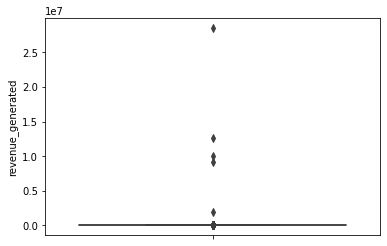

In [233]:
#boxplot
sns.boxplot(y=df_bookings['revenue_generated'])

In [234]:
#outlier removal

import numpy as np
q1=np.quantile(df_bookings['revenue_generated'],0.10)
q3=np.quantile(df_bookings['revenue_generated'],0.90)

In [235]:
#interquantile range
IQR=q3-q1

In [236]:
upper_limit=IQR+1.5*q3
lower_limit=IQR-1.5*q1

In [237]:
df_bookings=df_bookings[df_bookings['revenue_generated']<upper_limit]
df_bookings

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920
5,May012216558RT16,16558,1/5/2022,1/5/2022,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100
6,May012216558RT17,16558,28-04-22,1/5/2022,6/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
7,May012216558RT18,16558,26-04-22,1/5/2022,3/5/2022,2.0,RT1,logtrip,NaN,No Show,9100,9100
...,...,...,...,...,...,...,...,...,...,...,...,...
134584,Jul312217564RT45,17564,30-07-22,31-07-22,1/8/2022,2.0,RT4,others,2.0,Checked Out,32300,32300
134585,Jul312217564RT46,17564,29-07-22,31-07-22,3/8/2022,1.0,RT4,makeyourtrip,2.0,Checked Out,32300,32300
134587,Jul312217564RT48,17564,30-07-22,31-07-22,2/8/2022,1.0,RT4,tripster,NaN,Cancelled,32300,12920
134588,Jul312217564RT49,17564,29-07-22,31-07-22,1/8/2022,2.0,RT4,logtrip,2.0,Checked Out,32300,32300


**As there are some outliers in revenue generated, so we have removed them by using boxplot and inter quantile range method**

In [238]:
df_bookings['revenue_realized'].value_counts()

15300    10286
13500     6902
9000      6860
11050     6554
6500      5789
         ...  
8736        36
15960       26
14820       25
13832       24
14896       17
Name: revenue_realized, Length: 124, dtype: int64

In [239]:
df_bookings['revenue_realized'].describe()

count    134573.000000
mean      12695.983585
std        6927.791692
min        2600.000000
25%        7600.000000
50%       11700.000000
75%       15300.000000
max       45220.000000
Name: revenue_realized, dtype: float64

**3. Null values in ratings**

In [240]:
df_bookings.isnull().sum()

booking_id               0
property_id              0
booking_date             0
check_in_date            0
checkout_date            0
no_guests                0
room_category            0
booking_platform         0
ratings_given        77897
booking_status           0
revenue_generated        0
revenue_realized         0
dtype: int64

**Total values in our dataframe is 134576. Out of that 77899 rows has null rating. Since there are many rows with null rating, we should not filter these values. Also we should not replace this rating with a median or mean rating etc**

**Exercise-1. In aggregate bookings find columns that have null values. Fill these null values with whatever you think is the appropriate subtitute** 

In [241]:
df_agg_booking.describe()

,property_id,successful_bookings,capacity
count,9200.000000,9200.000000,9198.000000
mean,18040.640000,14.655761,25.280496
std,1099.818325,7.736170,11.442080
min,16558.000000,1.000000,3.000000
25%,17558.000000,9.000000,18.000000
50%,17564.000000,14.000000,25.000000
75%,18563.000000,19.000000,34.000000
max,19563.000000,123.000000,50.000000


In [242]:
df_agg_booking.isnull().sum()

property_id            0
check_in_date          0
room_category          0
successful_bookings    0
capacity               2
dtype: int64

In [243]:
df_agg_booking['capacity'].fillna(df_agg_booking['capacity'].median(),inplace=True) # replace null values with median

In [244]:
df_agg_booking['capacity'].mean()

25.280434782608694

In [245]:
df_agg_booking['capacity'].median()

25.0

In [246]:
df_agg_booking.isnull().sum()

property_id            0
check_in_date          0
room_category          0
successful_bookings    0
capacity               0
dtype: int64

In [247]:
df_agg_booking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9200 entries, 0 to 9199
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   property_id          9200 non-null   int64  
 1   check_in_date        9200 non-null   object 
 2   room_category        9200 non-null   object 
 3   successful_bookings  9200 non-null   int64  
 4   capacity             9200 non-null   float64
dtypes: float64(1), int64(2), object(2)
memory usage: 359.5+ KB


In [248]:
df_agg_booking['capacity']=df_agg_booking['capacity'].astype('int64')

**Exercise-2. In aggregate bookings find out records that have successful_bookings value greater than capacity. Filter those records**

In [249]:
df_agg_booking=df_agg_booking[df_agg_booking['successful_bookings']<=df_agg_booking['capacity']]

In [250]:
df_agg_booking

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,1-May-22,RT1,25,30
1,19562,1-May-22,RT1,28,30
2,19563,1-May-22,RT1,23,30
4,16558,1-May-22,RT1,18,19
5,17560,1-May-22,RT1,28,40
...,...,...,...,...,...
9195,16563,31-Jul-22,RT4,13,18
9196,16559,31-Jul-22,RT4,13,18
9197,17558,31-Jul-22,RT4,3,6
9198,19563,31-Jul-22,RT4,3,6


# --DATA TRANSFORMATION

**1. calculate occupancy% column**

In [251]:
df_agg_booking.head(3)

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,1-May-22,RT1,25,30
1,19562,1-May-22,RT1,28,30
2,19563,1-May-22,RT1,23,30


In [252]:
df_agg_booking['occupancy%']=df_agg_booking['successful_bookings']/df_agg_booking['capacity']

In [253]:
df_agg_booking['occupancy%']=df_agg_booking['occupancy%'].apply(lambda x:round(x*100,2))

In [254]:
df_agg_booking.head(2)

,property_id,check_in_date,room_category,successful_bookings,capacity,occupancy%
0,16559,1-May-22,RT1,25,30,83.33
1,19562,1-May-22,RT1,28,30,93.33


# INSIGHTS GENERATION

**1. What is an average occupancy rate in each of the room categories?**

In [255]:
df_agg_booking.groupby('room_category')['occupancy%'].mean().round(2).sort_values()

room_category
RT1    57.89
RT2    58.01
RT3    58.03
RT4    59.28
Name: occupancy%, dtype: float64

In [256]:
df_rooms

,room_id,room_class
0,RT1,Standard
1,RT2,Elite
2,RT3,Premium
3,RT4,Presidential


In [257]:
df=pd.merge(df_agg_booking,df_rooms,left_on='room_category',right_on='room_id')
df.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,occupancy%,room_id,room_class
0,16559,1-May-22,RT1,25,30,83.33,RT1,Standard
1,19562,1-May-22,RT1,28,30,93.33,RT1,Standard
2,19563,1-May-22,RT1,23,30,76.67,RT1,Standard
3,16558,1-May-22,RT1,18,19,94.74,RT1,Standard
4,17560,1-May-22,RT1,28,40,70.00,RT1,Standard


In [258]:
df.drop(columns=['room_id'],axis=1,inplace=True)

In [259]:
room_occ=df.groupby('room_class')['occupancy%'].mean().round(2).sort_values()
room_occ

room_class
Standard        57.89
Elite           58.01
Premium         58.03
Presidential    59.28
Name: occupancy%, dtype: float64

**Presidential suite has maximum average occupancy%**

**2. Print average occupancy rate per city**

In [261]:
df_hotels.head()

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi
3,16561,Atliq Blu,Luxury,Delhi
4,16562,Atliq Bay,Luxury,Delhi


In [262]:
df_agg_booking.head(2)

,property_id,check_in_date,room_category,successful_bookings,capacity,occupancy%
0,16559,1-May-22,RT1,25,30,83.33
1,19562,1-May-22,RT1,28,30,93.33


In [263]:
# merge above two columns

df1= pd.merge(df_agg_booking,df_hotels,on='property_id')
df1.head(3)

,property_id,check_in_date,room_category,successful_bookings,capacity,occupancy%,property_name,category,city
0,16559,1-May-22,RT1,25,30,83.33,Atliq Exotica,Luxury,Mumbai
1,16559,1-May-22,RT2,35,41,85.37,Atliq Exotica,Luxury,Mumbai
2,16559,1-May-22,RT3,27,32,84.38,Atliq Exotica,Luxury,Mumbai


In [264]:
df1.groupby('city')['occupancy%'].mean().round(2).sort_values()

city
Bangalore    56.33
Mumbai       57.91
Hyderabad    58.12
Delhi        61.51
Name: occupancy%, dtype: float64

**Delhi has the highest average occupancy rate while Bangalore has the least occupancy rate**

**3. When was the occupancy better? Weekday or Weekend?**

In [265]:
df_date.head(2)

,date,mmm yy,week no,day_type
0,01-May-22,May 22,W 19,weekend
1,02-May-22,May 22,W 19,weekeday


In [266]:
df_agg_booking.head(2)

,property_id,check_in_date,room_category,successful_bookings,capacity,occupancy%
0,16559,1-May-22,RT1,25,30,83.33
1,19562,1-May-22,RT1,28,30,93.33


In [267]:
df2= pd.merge(df_agg_booking,df_date,left_on='check_in_date',right_on='date')
df2.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,occupancy%,date,mmm yy,week no,day_type
0,19563,10-May-22,RT3,15,29,51.72,10-May-22,May 22,W 20,weekeday
1,18560,10-May-22,RT1,19,30,63.33,10-May-22,May 22,W 20,weekeday
2,19562,10-May-22,RT1,18,30,60.00,10-May-22,May 22,W 20,weekeday
3,19563,10-May-22,RT1,16,30,53.33,10-May-22,May 22,W 20,weekeday
4,17558,10-May-22,RT1,11,19,57.89,10-May-22,May 22,W 20,weekeday


In [268]:
df2.drop(columns=['date'],inplace=True)

In [269]:
df2.groupby('day_type')['occupancy%'].mean().round(2)

day_type
weekeday    50.88
weekend     72.34
Name: occupancy%, dtype: float64

**Occupancy was better on weekends**

**4: In the month of June, what is the occupancy for different cities**

In [270]:
df2['mmm yy'].value_counts()

May 22    2200
Jul 22    2198
Jun 22    2099
Name: mmm yy, dtype: int64

In [271]:
df= df2.merge(df_hotels,on='property_id')
df.tail()

,property_id,check_in_date,room_category,successful_bookings,capacity,occupancy%,mmm yy,week no,day_type,property_name,category,city
6492,16559,30-Jul-22,RT4,11,18,61.11,Jul 22,W 31,weekend,Atliq Exotica,Luxury,Mumbai
6493,16559,31-Jul-22,RT1,23,30,76.67,Jul 22,W 32,weekend,Atliq Exotica,Luxury,Mumbai
6494,16559,31-Jul-22,RT2,29,41,70.73,Jul 22,W 32,weekend,Atliq Exotica,Luxury,Mumbai
6495,16559,31-Jul-22,RT3,22,32,68.75,Jul 22,W 32,weekend,Atliq Exotica,Luxury,Mumbai
6496,16559,31-Jul-22,RT4,13,18,72.22,Jul 22,W 32,weekend,Atliq Exotica,Luxury,Mumbai


In [272]:
df[df['mmm yy']=='Jun 22'].groupby('city')['occupancy%'].mean().round(2).sort_values(ascending=False)

city
Delhi        62.47
Hyderabad    58.46
Mumbai       58.38
Bangalore    56.44
Name: occupancy%, dtype: float64

**5: We got new data for the month of august. Append that to existing data**

In [273]:
df_aug= pd.read_csv('new_data_august.csv')

In [274]:
df_aug.head(4)

,property_id,property_name,category,city,room_category,room_class,check_in_date,mmm yy,week no,day_type,successful_bookings,capacity,occ%
0,16559,Atliq Exotica,Luxury,Mumbai,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,30,30,100.00
1,19562,Atliq Bay,Luxury,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,21,30,70.00
2,19563,Atliq Palace,Business,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,23,30,76.67
3,19558,Atliq Grands,Luxury,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,30,40,75.00


In [275]:
df.shape

(6497, 12)

In [276]:
df_aug.shape

(7, 13)

In [277]:
df.head(2)

,property_id,check_in_date,room_category,successful_bookings,capacity,occupancy%,mmm yy,week no,day_type,property_name,category,city
0,19563,10-May-22,RT3,15,29,51.72,May 22,W 20,weekeday,Atliq Palace,Business,Bangalore
1,19563,10-May-22,RT1,16,30,53.33,May 22,W 20,weekeday,Atliq Palace,Business,Bangalore


In [278]:
final_data=pd.merge(df,df_rooms,left_on='room_category',right_on='room_id')
final_data.head(3)

,property_id,check_in_date,room_category,successful_bookings,capacity,occupancy%,mmm yy,week no,day_type,property_name,category,city,room_id,room_class
0,19563,10-May-22,RT3,15,29,51.72,May 22,W 20,weekeday,Atliq Palace,Business,Bangalore,RT3,Premium
1,19563,11-May-22,RT3,16,29,55.17,May 22,W 20,weekeday,Atliq Palace,Business,Bangalore,RT3,Premium
2,19563,12-May-22,RT3,15,29,51.72,May 22,W 20,weekeday,Atliq Palace,Business,Bangalore,RT3,Premium


In [279]:
final_data.drop(columns=['room_id'],inplace=True)

In [280]:
final_data.rename(columns={'occupancy%':'occ%'},inplace=True)

In [281]:
latest_data=pd.concat([final_data,df_aug],ignore_index=True)
latest_data.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,occ%,mmm yy,week no,day_type,property_name,category,city,room_class
0,19563,10-May-22,RT3,15,29,51.72,May 22,W 20,weekeday,Atliq Palace,Business,Bangalore,Premium
1,19563,11-May-22,RT3,16,29,55.17,May 22,W 20,weekeday,Atliq Palace,Business,Bangalore,Premium
2,19563,12-May-22,RT3,15,29,51.72,May 22,W 20,weekeday,Atliq Palace,Business,Bangalore,Premium
3,19563,13-May-22,RT3,15,29,51.72,May 22,W 20,weekeday,Atliq Palace,Business,Bangalore,Premium
4,19563,14-May-22,RT3,22,29,75.86,May 22,W 20,weekend,Atliq Palace,Business,Bangalore,Premium


In [282]:
latest_data.shape

(6504, 13)

**6. Print revenue realized per city**

In [283]:
df_bookings.head(2)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920


In [284]:
df_hotels.head(2)

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai


In [285]:
rev_data=df_bookings.merge(df_hotels,on='property_id')
rev_data.tail()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city
134568,Jul312217564RT45,17564,30-07-22,31-07-22,1/8/2022,2.0,RT4,others,2.0,Checked Out,32300,32300,Atliq Seasons,Business,Mumbai
134569,Jul312217564RT46,17564,29-07-22,31-07-22,3/8/2022,1.0,RT4,makeyourtrip,2.0,Checked Out,32300,32300,Atliq Seasons,Business,Mumbai
134570,Jul312217564RT48,17564,30-07-22,31-07-22,2/8/2022,1.0,RT4,tripster,NaN,Cancelled,32300,12920,Atliq Seasons,Business,Mumbai
134571,Jul312217564RT49,17564,29-07-22,31-07-22,1/8/2022,2.0,RT4,logtrip,2.0,Checked Out,32300,32300,Atliq Seasons,Business,Mumbai
134572,Jul312217564RT410,17564,31-07-22,31-07-22,1/8/2022,2.0,RT4,makeyourtrip,NaN,Cancelled,32300,12920,Atliq Seasons,Business,Mumbai


In [321]:
city_rev=rev_data.groupby('city')['revenue_realized'].sum()
city_rev

city
Bangalore    420383550
Delhi        294404488
Hyderabad    325179310
Mumbai       668569251
Name: revenue_realized, dtype: int64

<AxesSubplot:ylabel='city'>

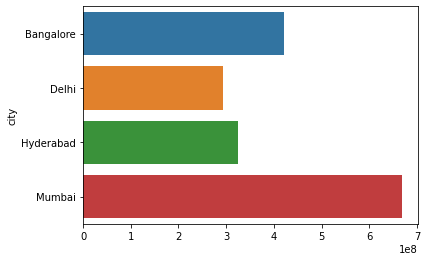

In [322]:
sns.barplot(city_rev.values,city_rev.index)

**7. Print month by month revenue**

In [287]:
df_date.head(2)

,date,mmm yy,week no,day_type
0,01-May-22,May 22,W 19,weekend
1,02-May-22,May 22,W 19,weekeday


In [288]:
df_date['date']=pd.to_datetime(df_date['date'])
df_date.head(2)

,date,mmm yy,week no,day_type
0,2022-05-01,May 22,W 19,weekend
1,2022-05-02,May 22,W 19,weekeday


In [289]:
df_bookings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 134573 entries, 1 to 134589
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   booking_id         134573 non-null  object 
 1   property_id        134573 non-null  int64  
 2   booking_date       134573 non-null  object 
 3   check_in_date      134573 non-null  object 
 4   checkout_date      134573 non-null  object 
 5   no_guests          134573 non-null  float64
 6   room_category      134573 non-null  object 
 7   booking_platform   134573 non-null  object 
 8   ratings_given      56676 non-null   float64
 9   booking_status     134573 non-null  object 
 10  revenue_generated  134573 non-null  int64  
 11  revenue_realized   134573 non-null  int64  
dtypes: float64(2), int64(3), object(7)
memory usage: 13.3+ MB


In [290]:
df_bookings['check_in_date']=pd.to_datetime(df_bookings['check_in_date'])
df_bookings.head(2)

C:\Users\User\AppData\Local\Temp\ipykernel_1180\1917549176.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bookings['check_in_date']=pd.to_datetime(df_bookings['check_in_date'])


,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
1,May012216558RT12,16558,30-04-22,2022-01-05,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,27-04-22,2022-01-05,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920


In [291]:
month_booking=pd.merge(df_bookings,df_date,left_on='check_in_date',right_on='date')
month_booking.head(3)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,date,mmm yy,week no,day_type
0,May052216558RT11,16558,15-04-22,2022-05-05,7/5/2022,3.0,RT1,tripster,5.0,Checked Out,10010,10010,2022-05-05,May 22,W 19,weekeday
1,May052216558RT12,16558,30-04-22,2022-05-05,7/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,2022-05-05,May 22,W 19,weekeday
2,May052216558RT13,16558,1/5/2022,2022-05-05,6/5/2022,3.0,RT1,direct offline,5.0,Checked Out,10010,10010,2022-05-05,May 22,W 19,weekeday


In [292]:
month_booking.drop(columns=['date'],inplace=True)

In [315]:
# monthwise revenue realized

month_rev=month_booking.groupby('mmm yy')['revenue_realized'].sum()
month_rev

mmm yy
Jul 22    389940912
Jun 22    377191229
May 22    408375641
Name: revenue_realized, dtype: int64

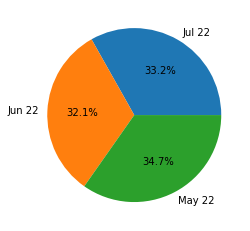

In [320]:
plt.pie(month_rev.values,labels=month_rev.index, autopct='%1.1f%%');

**8. Print revenue realized per hotel type**

In [294]:
df_hotels.head(3)

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi


In [295]:
hotel_type=pd.merge(df_bookings,df_hotels,on='property_id')
hotel_type.head(3)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city
0,May012216558RT12,16558,30-04-22,2022-01-05,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
1,May012216558RT15,16558,27-04-22,2022-01-05,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920,Atliq Grands,Luxury,Delhi
2,May012216558RT16,16558,1/5/2022,2022-01-05,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100,Atliq Grands,Luxury,Delhi


In [308]:
data=hotel_type.groupby('property_name')['revenue_realized'].sum().sort_values(ascending=False)
data

property_name
Atliq Exotica    320258588
Atliq Palace     304081863
Atliq City       285798439
Atliq Blu        260851922
Atliq Bay        259996918
Atliq Grands     211462134
Atliq Seasons     66086735
Name: revenue_realized, dtype: int64

In [311]:
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

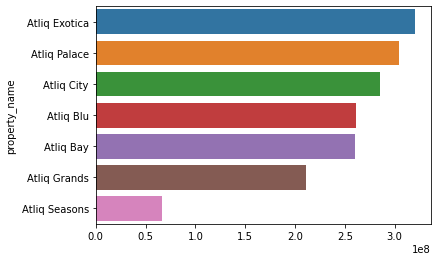

In [312]:
sns.barplot(data.values,data.index);


Atliq Exotica & Atliq Palace have the most realized revenue among others.

**9. Print average rating per city**

In [297]:
hotel_type.groupby('city')['ratings_given'].mean().round(2).sort_values()

city
Bangalore    3.41
Mumbai       3.65
Hyderabad    3.66
Delhi        3.78
Name: ratings_given, dtype: float64

**10.  Print a pie chart of revenue realized per booking platform**

In [298]:
platform_rev=df_bookings.groupby('booking_platform')['revenue_realized'].sum().sort_values()
platform_rev



booking_platform
direct offline     86374933
journey           102531334
tripster          123066801
direct online     168948637
logtrip           187494028
makeyourtrip      340814104
others            699306762
Name: revenue_realized, dtype: int64

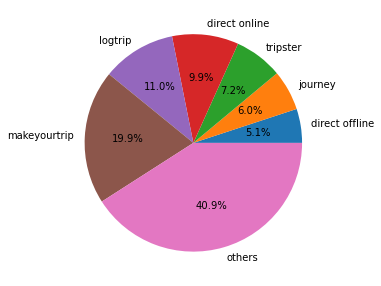

In [299]:
plt.figure(figsize=(10,5))
plt.pie(platform_rev,labels=platform_rev.index,autopct='%1.1f%%');

# INSIGHTS

**1. Presidential suite have maximum average occ%.
**2. Delhi has the most occupancy rate while Banglore has the least.
**3. On weekends, occupancy was observed more.
**4. In the month of June, Delhi had occupancy rate of 62%, HYderabad & Mumbai had around 58% and Bangore had approx 56%.
**5. Mumbai City is generating the most revenue among all cities.
**6. In the month of May, the most revenue is realized.
**7. Atliq Exotica & Atliq Palace have the most realized revenue among others whereas Atliq Seasons have the least realized revenue.
**8. Delhi is at the top in terms of ratings.
**9. makeyour trip and other platform have received the most bookings.